<a href="https://colab.research.google.com/github/thanadolch/AI_Prototype/blob/main/tensorflow(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. sequential ง่ายแต่สร้างได้แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง)
2. functional
3. subclassing

## Sequential

Import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Define

In [2]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

##train (รวมกับการนำข้อมูลใน colab notebook หน้า)

Predict

In [3]:
# Call model on a test input
x = tf.ones((4, 4))
y = model(x)

In [4]:
y

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[ 0.38734928, -0.02256544,  0.22312261,  0.22414525],
       [ 0.38734928, -0.02256544,  0.22312261,  0.22414525],
       [ 0.38734928, -0.02256544,  0.22312261,  0.22414525],
       [ 0.38734928, -0.02256544,  0.22312261,  0.22414525]],
      dtype=float32)>

## สร้าง sequential แบบที่สอง

In [5]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

##สร้าง NN แบบ Sequential สมบูรณ์

In [6]:
model3 = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

In [7]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [9]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


##ปรับเปลี่ยน Network

In [10]:
model2.pop()

In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [12]:
model2.add(layers.Dense(6))

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Call model on a test input
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[-0.08660924,  0.00991108, -0.00337201,  0.05394327,  0.03364506,
         0.01081396],
       [-0.08660924,  0.00991108, -0.00337201,  0.05394327,  0.03364506,
         0.01081396],
       [-0.08660924,  0.00991108, -0.00337201,  0.05394327,  0.03364506,
         0.01081396],
       [-0.08660924,  0.00991108, -0.00337201,  0.05394327,  0.03364506,
         0.01081396],
       [-0.08660924,  0.00991108, -0.00337201,  0.05394327,  0.03364506,
         0.01081396]], dtype=float32)>

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [17]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

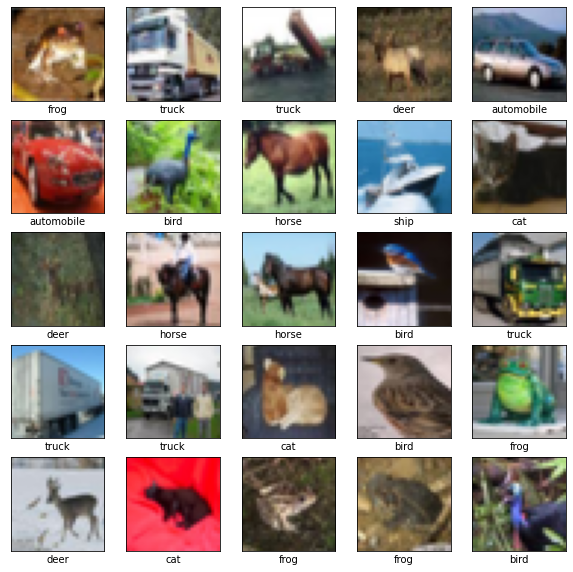

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Define

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

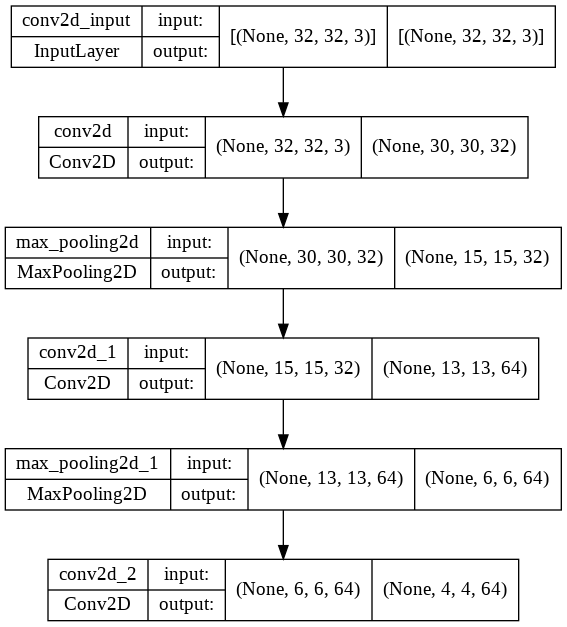

In [20]:
keras.utils.plot_model(model,show_shapes=True)

ต่อด้วย flatten เพื่อทำนาย

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

Define training parameters

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 8ms/step - loss: 1.5219 - accuracy: 0.4444 - val_loss: 1.2751 - val_accuracy: 0.5423
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1416 - accuracy: 0.5966 - val_loss: 1.1080 - val_accuracy: 0.6121
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9848 - accuracy: 0.6541 - val_loss: 0.9561 - val_accuracy: 0.6661
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8892 - accuracy: 0.6903 - val_loss: 0.9418 - val_accuracy: 0.6725
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8199 - accuracy: 0.7147 - val_loss: 0.8977 - val_accuracy: 0.6845
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7647 - accuracy: 0.7362 - val_loss: 0.9015 - val_accuracy: 0.6901
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7200 - accuracy: 0.7500 - val_loss: 0.8547 - val_ac

313/313 - 1s - loss: 0.8817 - accuracy: 0.7045 - 1s/epoch - 3ms/step


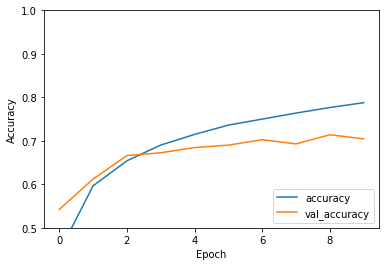

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Functional 

In [26]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [27]:
input_image = keras.Input(shape=(32,32,3), name="img")
model = layers.Conv2D(32, (3,3), activation='relu', name="conv1")(input_image)
model = layers.MaxPool2D((2,2), name="maxp1")(model)
model = layers.Conv2D(64, (3,3), activation='relu', name="conv2")(model)
model = layers.MaxPool2D((2,2), name="maxp2")(model)
model = layers.Conv2D(64, (3,3), activation='relu', name="conv3")(model)
model = layers.Flatten()(model)
model = layers.Dense(64, activation='relu')(model)
output = layers.Dense(10)(model)

In [28]:
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10))

In [29]:
my_model = keras.Model(input_image,output,name="my_model")

In [30]:
my_model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxp1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxp2 (MaxPooling2D)        (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0  

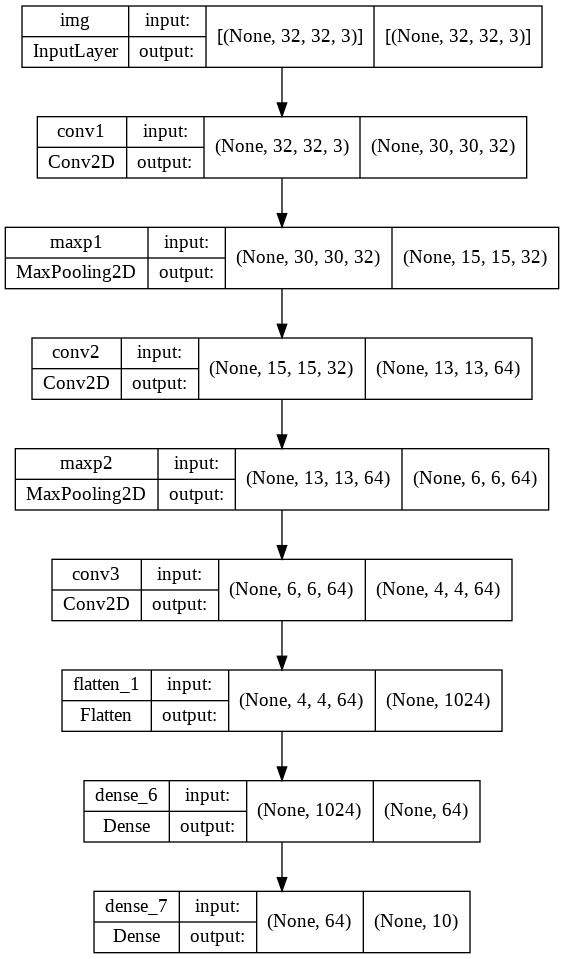

In [31]:
keras.utils.plot_model(my_model,show_shapes=True)

In [32]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
history = my_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4935 - accuracy: 0.4560 - val_loss: 1.2304 - val_accuracy: 0.5565
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1272 - accuracy: 0.6006 - val_loss: 1.0646 - val_accuracy: 0.6250
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9692 - accuracy: 0.6602 - val_loss: 0.9678 - val_accuracy: 0.6648
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8736 - accuracy: 0.6970 - val_loss: 0.9033 - val_accuracy: 0.6847
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7970 - accuracy: 0.7214 - val_loss: 0.9071 - val_accuracy: 0.6936
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7366 - accuracy: 0.7417 - val_loss: 0.8631 - val_accuracy: 0.7049
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6917 - accuracy: 0.7583 - val_loss: 0.8248 - val_ac

313/313 - 1s - loss: 0.8616 - accuracy: 0.7150 - 1s/epoch - 3ms/step


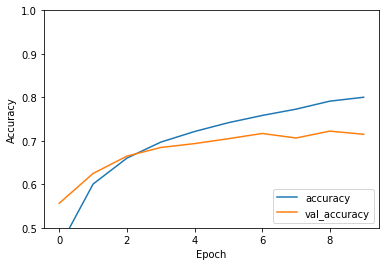

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [35]:
print(test_acc)

0.7149999737739563


#ResNet

In [36]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_3[0][0]']               
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_4[0][0]']               
                                                                                         

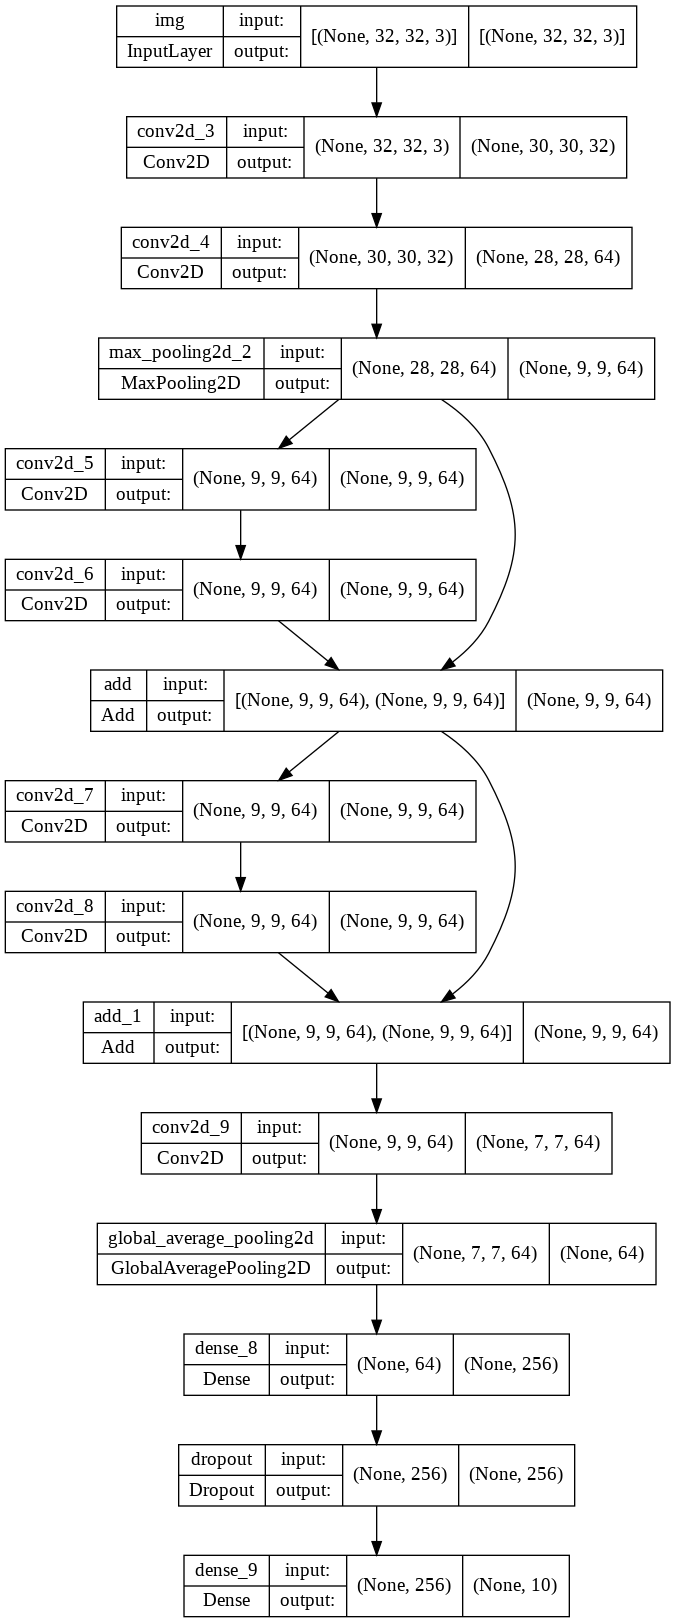

In [37]:
keras.utils.plot_model(resnet_model,show_shapes=True)

In [38]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
history2 = resnet_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.7091 - accuracy: 0.3398 - val_loss: 1.3217 - val_accuracy: 0.5047
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1865 - accuracy: 0.5725 - val_loss: 1.0373 - val_accuracy: 0.6131
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9701 - accuracy: 0.6507 - val_loss: 0.9196 - val_accuracy: 0.6700
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8493 - accuracy: 0.6985 - val_loss: 0.7949 - val_accuracy: 0.7234
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7673 - accuracy: 0.7311 - val_loss: 0.7630 - val_accuracy: 0.7329
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6919 - accuracy: 0.7604 - val_loss: 0.7490 - val_accuracy: 0.7464
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6378 - accuracy: 0.7793 - val_loss: 0.7243 -

In [40]:
print(test_acc)

0.7149999737739563


313/313 - 2s - loss: 0.6923 - accuracy: 0.7670 - 2s/epoch - 6ms/step


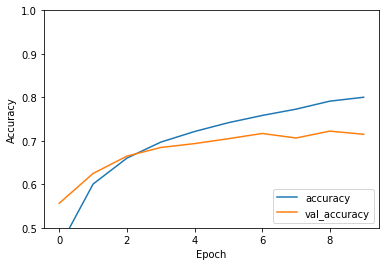

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=2)

# modify my_model ให้มี skip connection แล้ว train-test เทียบกับ my_model และ resnet_model

In [42]:
input_image2 = keras.Input(shape=(32, 32, 3), name="img2")
x = layers.Conv2D(32, (3,3), activation="relu")(input_image2)
x = layers.Conv2D(64, (3,3), activation="relu")(x)
block1 = layers.MaxPooling2D(2,2)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block1)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block2 = layers.add([x,block1])

x = layers.Conv2D(64, 3, activation="relu")(block2)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(10)(x)

In [43]:
my_resnet = keras.Model(input_image2, output, name="my_resnet")
my_resnet.summary()

Model: "my_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img2 (InputLayer)              [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 30, 30, 32)   896         ['img2[0][0]']                   
                                                                                                  
 conv2d_11 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_10[0][0]']              
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 14, 14, 64)  0           ['conv2d_11[0][0]']              
                                                                                          

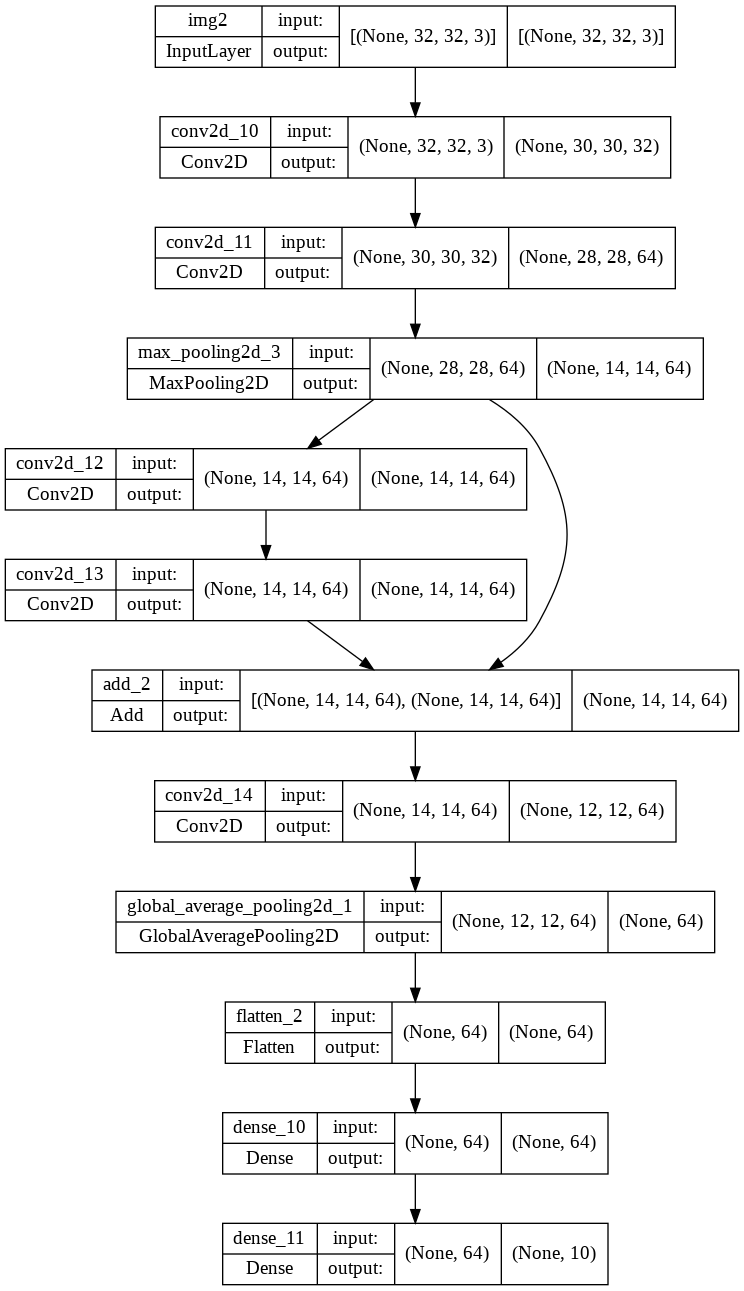

In [44]:
keras.utils.plot_model(my_resnet,show_shapes=True)

In [45]:
my_resnet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
history3 = my_resnet.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.7035 - accuracy: 0.3463 - val_loss: 1.4095 - val_accuracy: 0.4684
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2862 - accuracy: 0.5265 - val_loss: 1.2647 - val_accuracy: 0.5323
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0920 - accuracy: 0.6073 - val_loss: 1.0159 - val_accuracy: 0.6326
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9629 - accuracy: 0.6543 - val_loss: 0.9050 - val_accuracy: 0.6721
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8814 - accuracy: 0.6851 - val_loss: 0.8971 - val_accuracy: 0.6715
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8128 - accuracy: 0.7114 - val_loss: 0.7846 - val_accuracy: 0.7213
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7591 - accuracy: 0.7304 - val_loss: 0.8164 -

313/313 - 2s - loss: 0.6861 - accuracy: 0.7610 - 2s/epoch - 6ms/step


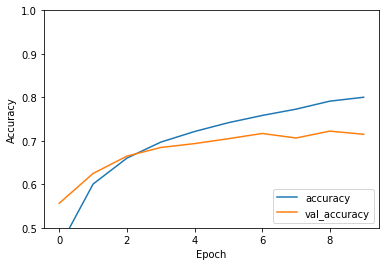

In [47]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_resnet.evaluate(test_images,  test_labels, verbose=2)

In [48]:
print(test_acc)

0.7609999775886536


#Tensorflow Data Pipeline

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
path2data = '/content/drive/My Drive/DQ'

In [56]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 198, 198, 32  896         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 196, 196, 64  18496       ['conv2d_22[0][0]']              
                                )                                                   

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=4,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 34 images belonging to 2 classes.


In [58]:
from tensorflow.keras import optimizers

In [59]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [60]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7,
      epochs=50,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
7/7 [==============================] - 10s 958ms/step - loss: 2.6858 - accuracy: 0.3462
Epoch 2/50
7/7 [==============================] - 1s 96ms/step - loss: 0.6741 - accuracy: 0.5385
Epoch 3/50
7/7 [==============================] - 1s 97ms/step - loss: 0.7116 - accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 1s 83ms/step - loss: 0.7251 - accuracy: 0.5769
Epoch 5/50
7/7 [==============================] - 1s 97ms/step - loss: 0.6261 - accuracy: 0.6786
Epoch 6/50
7/7 [==============================] - 1s 105ms/step - loss: 0.7039 - accuracy: 0.5385
Epoch 7/50
7/7 [==============================] - 1s 93ms/step - loss: 0.7174 - accuracy: 0.5000
Epoch 8/50
7/7 [==============================] - 1s 102ms/step - loss: 0.6939 - accuracy: 0.5769
Epoch 9/50
7/7 [==============================] - 1s 104ms/step - loss: 0.7236 - accuracy: 0.5714
Epoch 10/50
7/7 [==============================] - 1s 79ms/step - loss: 0.7307 - accuracy: 0.4615
Epoch 11/50
7/7 [=======

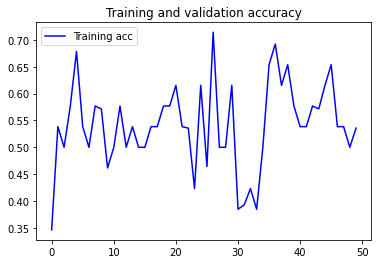

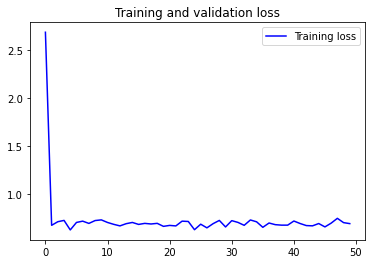

In [61]:
acc = history.history['accuracy']
# val_acc = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_x = range(len(acc))

plt.plot(epochs_x, acc, 'b', label='Training acc')
# plt.plot(epochs_x, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'b', label='Training loss')
# plt.plot(epochs_x, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()